## 1. Warmup: Autonomous Equations <a name="warmup"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

First, lets import all of our libraries: numpy for our numerical toolkit, odeint to solve ODE's and the pyplot section of matplotlib to graph our data.

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

Lets warm up by solving numerically the differential equation from the homework:

$$
\frac{dy}{dt} = \sin(y)
$$

We need to define a model, using `np.sin()` from the numpy library, and solve it using `odeint(model, y0, t)`, for initial condition $y(0) = .1$. Dont forget to define your time range using `np.linspace`, your time range should be between 0 and 20 approximately. 

In [2]:
def model(y,t):
    dydt = np.sin(y)
    return dydt

model(0,1)
    

0.0

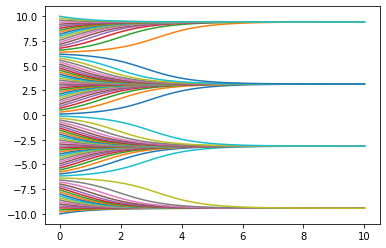

In [14]:
t = np.linspace(0,10, 100)


for y0 in np.linspace(-10,10,100):
    y_sol = odeint(model, y0, t)
    plt.plot(t,y_sol)

In [ ]:
def model(y,t):
    dydt = np.sin(y)
    return dydt

t = np.linspace(0,20)
y0 = .1

y_sol = odeint(model, y0, t)


plt.plot(t,y_sol)

### Revisiting loops: <a name="loops"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Lets say we want to plot 10 different initial conditions on the same plot to get a better feel for the space. One way to explore the solutions space would be to manually code in 10 different `y0` values, manually run odeint on each, and finally plot them all together. However, computers a very good at doing thing over and over, can Python do it for us?

A **loop** is a piece of code that is run over and over again, possibly with changing variables. Python has a unique way of defining loops in terms of **lists**. Let's show a quick example, take a look at the code below and then run it.

In [ ]:
a_list = [1,3,7,12,-4]

for var in a_list:      # Note,`var' is just a name, it could be anything
    print(var)
    print(2*var)
    print(var**2)
    print()

In the code above, we define a list called `a_list` and put some number in it. Note, that any text must be surrounded by `''` marks. The **for** loop sets a variable called `var` to each of the elements of the list and runs the code below it for each value of `var`. First, it just prints `var`, then it multiplies by 2 and prints it, then squares it and prints it. 

In Python, a for loop just sets a variable to each element of a list and then runs some code. Try using a for loop to solve the ODE $$y' = sin(y)$$ and plot the solutions for $y_0 = 1,\,2,\,3,\,4,\,5,\,6,\,7,\,8,\,9,\,10$. 

In [ ]:
initial_values = [0,1,2,3,4,5,6,7,8,9,10, 2*np.pi, 2*(3.14159)]

for y0 in initial_values:
    y_sol = odeint(model, y0, t)
    plt.plot(t,y_sol)

Note: What happens if you start on the unstable equilibrium solution $2\pi$? Try it using `2*np.pi` and `2*(3.14159)`. Why do you think there's a difference?

## 2. Systems of differential equations <a name="systemsofdiffeqs"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

The `odeint` solver can also handle coupled systems of differential equations, the model function just needs to output a *vector* $\vec X' = \left[\frac{dx}{dt},\frac{dy}{dt}\right]$ instead of a single *value* like $\frac{dy}{dt}$. For example, consider the coupled equations

\begin{align}
\frac{dx}{dt} &= y(t)\,,\hspace{4em} &x(0)&=0\,,
\\
\frac{dy}{dt} &= -x(t)\,, &y(0)&=1\,.
\end{align}

Writing

$$
\vec X' = \left[\begin{matrix} x'\\y' \end{matrix}\right] = \left[\begin{matrix} y\\-x \end{matrix}\right]
$$

We can solve this system of equations using `odeint` by using the vector `X = [x,y]` for $\vec X$, and making our function `model(X,t)` a function of `X` that returns a vector `dXdt = [dxdt,dydt]`. Take a look at the code below, and then read the following explanation.

In [3]:
P = [1,3,4]

[a,b,c] = P

In [4]:
P = [c,b,a]
P

[4, 3, 1]

In [26]:
def model(X, t):
    [x,y] = X         # 
    dxdt = y
    dydt = -x
    dXdt = [dxdt,dydt]
    return dXdt

In [27]:
def model(X,t):
    x,y = X
    dXdt = [y,-x]
    return dXdt

In the code above, we know that `X` is actually a list with two entries. The line `x,y = X` saves those entries to variables `x` and `y`. This can them easier to use, but we could also use `X[0]` and `X[1]`. 

In the second line, we make a new list which the first entry containing the formula for $x'$ and the second entry containing the formula for `y'`. We then return the vector of derivatives. 

Take a second and run this function on different inputs.

In [29]:
X0 = [0,1]
t = np.linspace(0,10,100)

X_sol = odeint(model, X0, t)

In [34]:
X_sol

array([[ 0.        ,  1.        ],
       [ 0.10083841,  0.99490282],
       [ 0.20064884,  0.97966323],
       [ 0.29841379,  0.95443659],
       [ 0.3931366 ,  0.91948007],
       [ 0.48385162,  0.87515003],
       [ 0.56963409,  0.8218984 ],
       [ 0.64960949,  0.76026804],
       [ 0.72296254,  0.69088722],
       [ 0.78894544,  0.61446325],
       [ 0.84688554,  0.5317752 ],
       [ 0.89619218,  0.44366605],
       [ 0.9363627 ,  0.351034  ],
       [ 0.9669876 ,  0.25482339],
       [ 0.98775467,  0.15601501],
       [ 0.99845221,  0.05561616],
       [ 0.99897116, -0.04534966],
       [ 0.98930623, -0.14585317],
       [ 0.96955595, -0.2448698 ],
       [ 0.93992166, -0.34139014],
       [ 0.90070547, -0.43443022],
       [ 0.85230715, -0.52304156],
       [ 0.7952201 , -0.60632082],
       [ 0.73002629, -0.68341902],
       [ 0.65739032, -0.7535502 ],
       [ 0.57805268, -0.81599941],
       [ 0.49282214, -0.87013003],
       [ 0.4025676 , -0.91539023],
       [ 0.30820913,

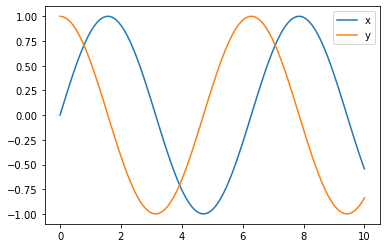

In [44]:
plt.plot(t,X_sol[:,0], label="x")
plt.plot(t,X_sol[:,1], label="y")
plt.legend()

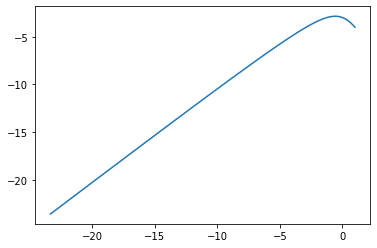

In [58]:
def model(X,t):
    x,y = X
    dXdt = [2*x+2*y,5*x-1*y]
    return dXdt

t = np.linspace(0,1,100)
X0 = [10,-10]

X_sol = odeint(model, [x0,-4], t)
plt.plot(X_sol[:,0], X_sol[:,1])

Now, to fit we just set the starting values for `x` and `y` by specifying `X0 = [0,1]` and run the estimator.

In [ ]:
X0 = [0,1]
t = np.linspace(0,10,100)

sol = odeint(model,X0,t)

print(sol)

The first column of `sol` is the list of `x` values associated to each `t` value and the second column is the list of `y` values. We can plot these on the graph. 

How do we get a column of just the `x` values or just the `y` values? Python uses matrix like notation to access elements of a list, except that **the first column and first row is always 0 not 1**.

For example, `sol[4,0]` is the 5'th row of column 0 and `sol[4,1]` is the 5'th row of column 1: 

To get *all* of the rows in column 1, we use the __slice delimiter__ `:`. The slice delimiter helps us select subsets of a list, for examples `sol[3:7,0]` returns rows 3 __up to__ row 7 of the column 0; that is rows 3, 4, 5, 6. 

<div class="alert alert-block alert-danger">
<b>Warning:</b> By Python convention, `sol[a:b]` returns the vector entries from `a` to `b-1`. The reason is that Python wants `sol[:4]` to return the first `4` entries but Python since starts indexing from 0 the first 4 entries are `sol[0], sol[1], sol[2], sol[3]`. 

This can take some getting used to, but it does mean that `sol[a:b]` returns exactly $b-a$ entries.
</div>

To get a full column, we just use the slice operator alone. For example `sol[:,0]` returns the whole of column 0, just like `sol[4,:]` returns all of row 4. 

In [ ]:
xsol = sol[:,0]
ysol = sol[:,1]

We can now plot our solutions for $x$ and $y$:

In [ ]:
## 
plt.plot(t,xsol)
plt.plot(t,ysol)

*or* think about them as tracing out a path $(x(t), y(t)) \in \mathbb{R}^2$ by plotting them against each other. 

In [ ]:
plt.plot(xsol,ysol)

Note, we could also just plot the columns of the array of solutions:

In [ ]:
plt.plot(sol[:,0],sol[:,1])

## Practice: <a name="apps2"></a>

### 2.1 Coupled Linear Systems <a name="CLS"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Use a model with vector input `X` and output `[dxdt,dydt]` to solve the initial value problem 

\begin{align}
\frac{dx}{dt} &= .7x(t) + y(t)\,,\hspace{4em} &x(0)&=0\,,
\\
\frac{dy}{dt} &= -x(t)\,, &y(0)&=1\,.
\end{align}

Set up a `model` for this system and solve it for $t\in [0,20]$ using `odeint` and plot $x$ vs $t$, $y$ vs $t$ and $x$ vs $y$..

### 2.3 Coupled Nonlinear Systems <a name="CNLS"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Use a model with vector input `X` and output `[dxdt,dydt]` to solve the initial value problem 

\begin{align}
\frac{dx}{dt} &= \frac{yx}{10} - y\,,\hspace{4em} &x(0)&=1\,,
\\
\frac{dy}{dt} &= x- \frac{xy}4 \,, &y(0)&=1\,.
\end{align}

Set up a `model` for this system and solve it for $t\in [0,10]$ using `odeint` and plot $x$ vs $t$, $y$ vs $t$ and $x$ vs $y$. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2477: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1t - x0t) * margin
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2477: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1t - x0t) * margin


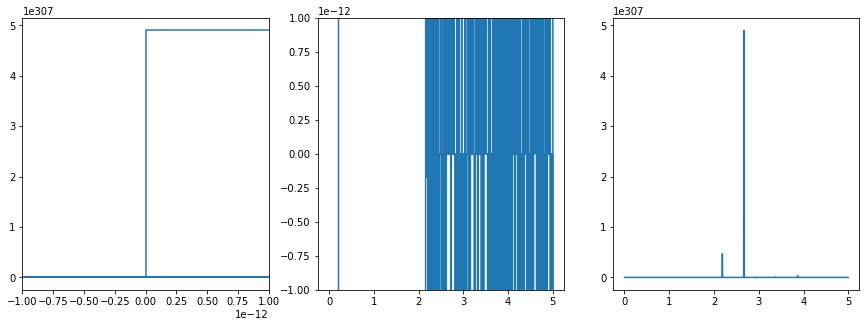

In [80]:
def model(X,t):
    x,y = X
    dXdt = [y*x/10 - y ,x - x*y/4 ]
    return dXdt

t = np.linspace(0,5,1000)
X0 = [1,5]

X_sol = odeint(model, X0, t)

f, ax = plt.subplots(1,3,figsize=[15,5])

ax[0].plot(X_sol[:,0], X_sol[:,1])
ax[1].plot(t, X_sol[:,0])
ax[2].plot(t, X_sol[:,1])

## 3. Subplots<a name="subplots"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

There are two ways to use subplots with Python, the first to explicitly define a grid of plots and then plot to each entry in the grid. The second is to implicitly plot to a grid of plots, and let Python work out if you can do that or not. 

### Explicit Plotting:

To compare multiple features at once it's useful to create a matrix of side by side subplots. To create such a matrix, we use the subplots call to include a shape vector describing the number of subplots we want

* `fig, axes = plt.subplots(m,n, figsize = [W,H] )` returns an `m` by `n` matrix of subplots. It stores the reference variable for each subplot in the matrix of subplots in the list `axes`. It also returns a reference to the overall figure containing the subplots, which we store in `fig`. You can plot to the subplot in position (i,j) with `axes[i,j].plot(xvalues, yvalues)`. 

    In addition to allowing multiple plots, the `subplots` function allows us to control the size of the overall figure with the `figsize` variable. `figsize` takes a vector giving the height and width of the figure in inches. 
 
    For more information [see the documentation](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html).
    
<img width = 400 src="https://i.postimg.cc/rpBDD4X2/L2Img1.png">

For example, we can summarize the $x$ vs $t$, $y$ vs $t$ and $y$ vs $x$ plots using three subplots of a 2x2 grid. Note that instead of calling `plt.plot(...)` we now plot directly to each axis by calling `axes[i,j].plot(...)`.

When using explicit subplots, we have to use different functions to set the title, axis and legend:

* `axes[i,j].set_title('Title', fontsize=20)`  - Set the title of the axis $i$, $j$ with a particular fontsize.
* `axes[i,j].set_xlabel('x', fontsize=20)` - Set the axis labels of the axis $i$, $j$ with a particular fontsize.
* `axes[i,j].legend(loc='upper right', fontsize=20)` - Generates a legend for axis $i$, $j$ with a particular fontsize.

In [ ]:
f, axes = plt.subplots(2,2, figsize = [20,10])

axes[0,0].plot(sol[:,0],sol[:,1], label="Phase Line")
axes[0,0].set_title('y vs x')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')
axes[0,0].legend(loc="upper right", fontsize=20)

axes[1,0].plot(t,sol[:,1])
axes[1,0].set_title('y vs t', fontsize=20)
axes[1,0].set_xlabel('t', fontsize=20)
axes[1,0].set_ylabel('y', fontsize=20)

axes[0,1].plot(t,sol[:,1])
axes[0,1].set_title('x vs t')
axes[0,1].set_xlabel('t', fontsize=10)
axes[0,1].set_ylabel('x', fontsize=10)

Or, since we have an empty grid slot, we can use a 1 by 3 grid:

### Implicit Plotting:

Python also allows implicit plotting using `plt.subplot()`:

* `plt.subplot(mni)` or ` plt.subplot(m,n,i)` - Sets the default plot to plot with index `i` on a grid of `m` by `n` plots. Here, `m` is the number of rows, `n` is the number of columns. The index `i` starts counting at 1 from the top left corner and increases down the rows. After `plt.subplot()` has been called, it can be plotted to using `plt.plot()`. 

<img width = 600 src="https://i.postimg.cc/zBmPxqRY/L2Img2.png">


You can set the size of the figure and the spacing between the subplots using

* `f = plt.figure(figsize=[M,N])` - Make a new figure with width `M` and height `N`.
* `f.subplots_adjust(wspace=1, hspace=.5)` - Adjust the offsets and padding for the subplots. This allows you to control the spacing between axes. 

In [ ]:
f = plt.figure(figsize=[10,5])
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

plt.subplot(231)

plt.plot(sol[:,0],sol[:,1])
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(234)
plt.plot(t,sol[:,1])
plt.title('y vs x')
plt.xlabel('x')

plt.subplot(236)

plt.plot(t,sol[:,1])
plt.title('y vs x')
plt.xlabel('x')

The main advantages of using implicit plotting are twofold: first, you can use the standard plot functions to add labels, legends, and titles. Second, you can mix and match the sizes of graphs, as long as the grids match. For example, we can combine the 2x2 grid with the 1x2 grid, plotting a single plot over the two right subplots.

<img width = 400 src="https://i.postimg.cc/QC6MQ4Yw/L2Img3.png">

### 3.1 Practice: <a name="PRC"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>


Use a model with vector input `X` and output `[dxdt,dydt]` to solve the initial value problem 

\begin{align}
\frac{dx}{dt} &= x(1-x) - 5\frac{xy}{1+x} \,,\hspace{4em} &x(0)&=1\,,
\\
\frac{dy}{dt} &= 5\frac{xy}{1+x} - y \,, &y(0)&=1\,.
\end{align}

Set up a `model` for this system and solve it for $t\in [0,50]$ using `odeint` and plot $x$ vs $t$, $y$ vs $t$ and $x$ vs $y$.

### 3.2 Coupled Non-smooth Systems <a name="CNSS"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Consider the simple digestion model, where a drug is absorbed into the stomach, passes to the blood stream and then is filtered out by the kidneys. If the concentration in the stomach, blood and kidneys are respectively $S$, $B$ and $K$, one way diffusion yields the the following system of equations

\begin{align}
\frac{dS}{dt} &= -r_S S
\\
\frac{dB}{dt} &= a_B S - r_B B
\\
\frac{dK}{dt} &=  a_K B
\end{align}

Assume that the kinetic constants are $r_S = 2.28$ and $a_B = .91$, $r_B = .53$ and $a_K = .0155$ . A dose of drug is quickly absorbed into the stomach, brining the concentration to 55 mg/L. In these equations, $t$ is given in hours and a does is given every 5 hours.

To model this system, we will iterate the ode solver over intervals of 10 hours to check the result of redosing. First, set up an solve the system above for $S(0) = 55$, $B(0) = 0$ and $K(0) = 0$ over the first 24 hours. What is the maximum concentration of drug in the blood?

Now, we will run the ODE solver for 24 hours exactly. We will then take the last set of values for $[S,B,K]$, add 55 to $S$, and feed the resulting vector back into the ODE solver for the next 24 hours. 


If we do this many times, is there a maximum $B$ can reach, or could it theoretically rise infinitely? Does the minimum amount stabilize, and at what value?

How could we answer these questions analytically?

## Case Study: Influenza Outbreak <a name="CTD"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

In ["Anonymous (1978). Influenza in a boarding school"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1603269/pdf/brmedj00115-0064.pdf) the number of cases per day of an influenza infection in a English boarding school was measured. A total of 763 boys between the ages of 10 and 18 were at risk. 

This information is summarized in a database by the [R Epidemics Consortium (RECON)](http://www.repidemicsconsortium.org/outbreaks/index.html), the details of which can be found [here](http://www.repidemicsconsortium.org/outbreaks/reference/influenza_england_1978_school.html). Below, we put this information in an object called a **data frame**. A data frame is a table with headings, so that you can access the entries in a more human readable way.  

In [85]:
import pandas as pd

d = {'day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
     'in_bed': [3, 7, 22, 78, 233, 300, 256, 233, 189, 128, 72, 33, 11, 6]}

influenza = pd.DataFrame(d)
influenza

,day,in_bed
0,1,3
1,2,7
2,3,22
3,4,78
4,5,233
5,6,300
6,7,256
7,8,233
8,9,189
9,10,128


The columns of the dataframe can be access by name by using `influenza['day']`

In [82]:
print(influenza['day'])
print(influenza['in_bed'])

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
Name: day, dtype: int64
0       3
1       7
2      22
3      78
4     233
5     300
6     256
7     233
8     189
9     128
10     72
11     33
12     11
13      6
Name: in_bed, dtype: int64


We can plot the number of sick children from the 'influenza' dataset using the same plot function at before, only this time we may want to change from a line plot to a scatter plot. We do this by adding a flag `'o'` after the `x` and `y` data:

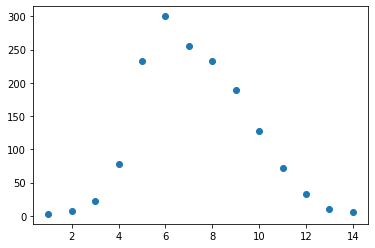

In [83]:
plt.plot(influenza['day'],influenza['in_bed'],'o')

Lets return to our SIR epidemic model. Since the recovered patients don't feed back into the system we only model the susceptible and infected patients:

\begin{align}
\frac{dS}{dt} &= -\beta S I\,,
\\
\frac{dI}{dt} &= \beta S I- \gamma I\,,
\end{align}

for $t\in[0,20]$. Barnes and Fulford estimate transmission coefficient at $\beta = 2.18\times 10^{-3}$ and the recovery rate at $\gamma = 0.44$, $I(0) = 0$. Setup and solve a model for this differential equation and plot the results on the $S$ vs $I$ plane for $I(0) = 1$ and $S(0) = 100, 200, 300, 400, 500$ and $800$. 



### Analytic Problem 1: 

Compute the basic reproduction number given the values of $\beta$ and $\gamma$. What is the population above which an epidemic will result? Check this result numerically by plotting the solution for $I_0 = 1$ and $S_0$ equal to the basic reproduction number, a little above, and a little below. 

If you are unsure about this, see the discussion of the _basic reproduction number_ in Section 5.1 of the book.

### Computational Problem 2

Compare the model we have constructed to the actual data when the initial susceptible population is 736. Plot the modeled result for the infected population on the same plot at the actual data.

Lets assume further that the error in the parameters may be wrong by up to 10%. It is difficult to construct explicit confidence intervals for differential equations but we can get a heuristic estimate by checking the 4 combinations of extreme values for the parameters: $\beta (1\pm .1)$ and $\gamma (1 \pm .1)$. How many points are captured within this makeshift confidence interval? 

### Discussion Problem 3:

1) Does the model with the given paramaters fit the data well? Why or why not?

2) Assume we construct a confidence interval by taking the maximum and minimum value of $I(t)$ for all $\beta$ and $\gamma$ within 10% of the given values. Would the boundary of the interval be smooth?

# Homework:

## Computation:

### Problem 1:

Explicitly solve the system of equations below:

\begin{align*}
x_1 &= 2x_1 - 3x_2
\\
x_2 &= -4x_1 +3x_2
\end{align*}

### Problem 2:

Describe the solutions to the following system of equations:

\begin{align*}
x_1 &= 2x_1 + 4x_2
\\
x_2 &= -x_1 +2x_2
\end{align*}


### Problem 3:

Consider the system of equations

\begin{align*}
x_1 &= -2x_1 + ax_2
\\
x_2 &= -ax_1 +3x_2
\end{align*}

Describe the asymptotic behavior of the solutions for different values of $a$ using the trace determinant plane. What are the phases of the solutions?

## Case Study: Cholera Outbreak <a name="CASE1"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

#### Background:

Based on [Endemic and Epidemic Dynamics of Cholera: The Role of the Aquatic Reservoir](https://www.researchgate.net/publication/12123535_Endemic_and_Epidemic_Dynamics_of_Cholera_The_Role_of_the_Aquatic_Reservoir) and the textbook.

Cholera is a water born disease that is particularly dangerous in areas where sanitation is inadequate and sewage can find its way into the drinking water supply. Modeling can provide an understanding of the circumstances under which an outbreak can occur. Here we formulate a model that include interacting susceptible and infectious populations. However, what is different from the usual case is twofold: first, we include transmission from the environment and second we imagine tracking the disease over a long period of time and so we include birth and death rates. 

#### Governing Equations:
The variables needed to describe the prevalence of cholera in the population are $S(t)$, susceptible, and $I(t)$, infective, where $t$ is time. Another important variable is the concentration of cholera bacteria in the water supply. We will use $B(t)$ to represent bacterial concentration. This will change in time as more bacteria enter the water supply through ongoing sewage contaminations, which then increases with an increasing number of infected producing cholera bacteria. 

#### State Variables:

|Parameter| Description |
|---|---|
|$S$| Number of susceptible |
|$I$| Number of infected |
|$B$| Concentration of cells in water (cells/ml)|

#### Parameters:

|Parameter| Description | Village 1 | Village 2 | Village 3|
|---|---|---|---|---|
|$H$| Total human population |10,000|10,000|10,000|
|$a$| Rate of exposure to contaminated water (days$^{-1}$) |.5|1|1|
|$k$| Concentration of bacteria that leads to 50% infection rate (cells/ml) |$10^6$|$10^6$|$10^6$|
|$r$| Recovery rate (days$^{-1}$) |0.2|0.2|0.2|
|$n_b$| Growth/death rate of cholera bacteria in water (days$^{-1}$) |-.33|-.33|-.33|
|$e$| Rate of bacteria excretion per person $\left(\frac{\text{cells}}{\text{(ml)(days)(person)}}\right)$|10|10|10|

#### Equations:

We set up the following system of differential equations:

\begin{align}
\frac{dS}{dt} &= -\lambda(B)S\,,
\\
\frac{dI}{dt} &= \lambda(B)S - rI\,,
\\
\frac{dB}{dt} &= Bn_b + eI\,.
\end{align}

Here, $\lambda(B)$ is the **force of infection**. We assume that cholera is only contracted through contact with the environment and not through person-to-person contact. The force of infection is the probability per unit time of a susceptible being infected. While we could assume the probability is proportional to the bacterial concentration $B(t)$ times rate of exposure $a$, it is more realistic to assume it is linear for small $B(t)$ and then tends to 1 (100% of infection) as $B$ becomes large. We thus use a standard **hill function**

$$
\lambda(B) = ap(B) = a\frac{B}{k+B}\,.
$$

Substituting this in for $\lambda(B)$ we obtain the equations

\begin{align}
\frac{dS}{dt} &= -a\frac{B}{k+B}S
\\
\frac{dI}{dt} &= a\frac{B}{k+B}S - rI
\\
\frac{dB}{dt} &= Bn_b + eI
\end{align}


### Overview:

In the questions below, we will explore whether the equations above can simulation the following situations: 

* No outbreak occurs.
* A finite outbreak occurs.
* Cyclic outbreak occur as new susceptible population members are added.

We want to understand the relationship between the parameters $a$, $k$, $r$, $n_b$ and $e$ and the outcome of the epidemic.  Since there are three dynamic variables, it is difficult to draw a 2d trajectory diagram based on nullclines. Instead, we will explore the equations numerically, and then use steady state assumptions as derive the critical town size. 

### Computational Question 1:

Set up the model for the system of differential equations corresponding to Village 1. We want to understand the population size at which an outbreak will occur. 

Simulate the equations above for no bacteria and single sick patient, that is $S(0) = H-1$, $I(0) = 10$ and $B(0) = 0$ for 

$$
H = [9000, 11000, 13000, 15000, 17000]
$$

Plot $S(t)$ vs $I(t)$ for each of the initial populations on the same graph. Be sure to label your axes. 

To the nearest 100, what is the smallest value of $H$ for which there is no increase in the number of infected?

### Analytic Question 2:

We want to determine the **basic reproduction number** $R_0$ and from it the **critical town size** $S_C$, that is the town size for which a single infected member of the population will lead to an outbreak. To determine if an outbreak will occur, we must determine if a single member of the population can infect more than 1 other member of the population during the time they are sick. 

We will estimate the maximum amount of bacteria produced by a single infected $B_1$ will be the equilibrium solution for $B'$ when $I = 1$

$$
0 = B' = B_1 n_b + e \hspace{4em} \Rightarrow \hspace{4em} B_1 = -\frac e{n_b}
$$

For a single infection, we assume that $B_1 << K$, so we can also assume that 

$$
\frac{B_1}{k+B_1} \approx \frac{B_1}{k}\,.
$$

#### Question 2.a:

Using $B \approx B_1$ when $I=1$, find a formula for the basic reproduction number by solving $I' = 0$. This formula gives a condition for the number of infections to be roughly constant.

#### Question 2.b: 

The number of infected will increase if $R_0>0$. Solve $R_0>0$ for an expression for the **critical town size** $S_0$ such that $R_0>0$.

### Computational Question 3:

Ultimately, we want to construct a kind of "phase space" for the parameters so we can understand clearly how different starting conditions lead to different kinds of outcomes, and hopefully to prevent outbreaks. Using your formula from Question 2 we want to use the critical town side to evaluate the changing of different parameters. 

#### Question 3.a:

Fix all quantities as in the table in the case study. Construct a phase plot for the parameters

    1) $S_0$ vs $e$, $a = .5$,
    2) $S_0$ vs $a$, $e = 10$,
    3) $a$ vs $e$, $S_0 = 10,000$,

by plotting the line $R_0 = 0$. Clearly describe for which values of the parameters on each chart the outbreak will occur. 

#### Question 3.b:

Given the initial starting values, if it is equally easy to increase/decrease $e$ and $a$ by a fixed percentage, which would be the most efficient variable to adjust?

### Analytic Question 4:

Assume that after a time the population becomes susceptible again. We will model this situation by adding a recovered population that slowly moves back into the susceptible population. 

\begin{align}
\frac{dS}{dt} &= -a\frac{B}{k+B}S + dR
\\
\frac{dI}{dt} &= a\frac{B}{k+B}S - rI
\\
\frac{dB}{dt} &= Bn_b + eI
\\
\frac{dR}{dt} &= rI - dR
\end{align}

#### Problem 4.a:

Find the equilibrium (constant) solutions to the equations above, that is the solutions with $S' = I' = B' = R' = 0$. There are different numbers of equilibrium solutions for different values of the parameters. Classify these behaviors. 

#### Problem 4.b:

Numerically solve for an example where there is an equilibrium solution with nonzero $I$ using an initial value of $S(0)$ above the critical size and $I(0) = 1$. Plot the result and describe the behavior . 